In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from pandas.plotting import table
import seaborn as sns
import datetime as dt

%matplotlib inline
sns.set(color_codes=True)

In [2]:
trainDataWithoutNaNDir = "dataset/two-sigma-connect-rental-listing-inquiries/trainCleaned.json.zip"

In [3]:
trainData = pd.read_json(trainDataWithoutNaNDir, convert_dates=['created'])
trainData = trainData.reset_index(drop=True)
outlier_counts = pd.DataFrame(columns=['outlier_counts'])

In [4]:
trainData.count()

bathrooms          46153
bedrooms           46153
building_id        46153
created            46153
description        46153
display_address    46153
features           46153
interest_level     46153
latitude           46153
listing_id         46153
longitude          46153
manager_id         46153
photos             42880
price              46153
street_address     46153
dtype: int64

# Checking outlier for price, lat and long

## Latitude and Longitude info

In [5]:
#https://en.wikipedia.org/wiki/New_York_(state)
#https://www.latlong.net/degrees-minutes-seconds-to-decimal-degrees
# In Degree:
# Lat = [40° 30′ N to 45° 1′ N]
# Long = [71° 51′ W to 79° 46′ W]
minLat = 40.40
minLong = -79.76666667
maxLat = 45.01666667
maxLong = -71.85

### Latitude

In [6]:
outlierLat = trainData[['latitude']]

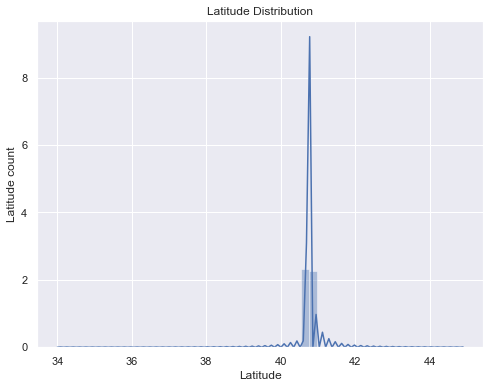

In [7]:
plt.figure(figsize=(8,6))
plt.title("Latitude Distribution")
plt.xlabel("Latitude")
plt.ylabel("Latitude count")
# plt.hist(outlierLat.latitude, range=(outlierLat.latitude.min(),outlierLat.latitude.max()), bins=50)
sns.distplot(outlierLat.latitude.values, bins=50)
# plt.show()
plt.savefig("figures_saved/dist_latitude_full")

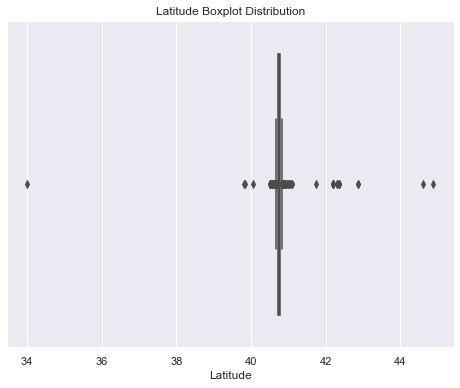

In [8]:
plt.figure(figsize=(8,6))
plt.title("Latitude Boxplot Distribution")
plt.xlabel("Latitude")
ax = sns.boxplot(outlierLat.latitude.values)
# plt.show()
plt.savefig("figures_saved/boxplot_latitude")

In [9]:
#Check within longitude bound
row, column = np.where(outlierLat.applymap(lambda x: (x < minLat) | (x > maxLat)))
outlierLat.iloc[row]

,latitude
18507,34.0126
39993,39.8395
42918,40.0450
45473,39.7996


In [10]:
# display(outlierLat.iloc[row].count())
# outlier_counts = outlier_counts.append(outlierLat.iloc[row].count(), ignore_index=True)
# outlier_counts = pd.concat([outlier_counts, outlierLat.iloc[row].count()])
outlier_counts.loc['latitude'] = outlierLat.iloc[row].count().values
display(outlier_counts)

,outlier_counts
latitude,4


In [11]:
# trainData = trainData.drop(row, errors='ignore')
trainData = trainData.drop(trainData.index[row], errors='ignore')

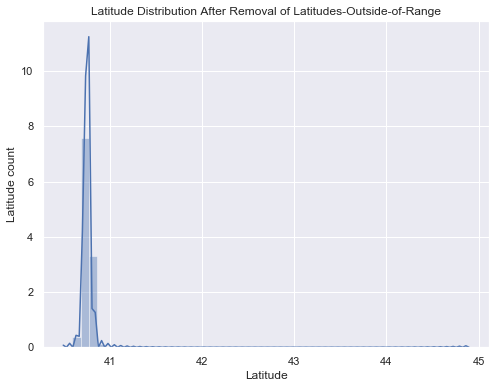

In [12]:
plt.figure(figsize=(8,6))
plt.title("Latitude Distribution After Removal of Latitudes-Outside-of-Range")
plt.xlabel("Latitude")
plt.ylabel("Latitude count")
# plt.hist(trainData.latitude, range=(trainData.latitude.min(),trainData.latitude.max()), bins=50)
sns.distplot(trainData.latitude.values, bins=50)
# plt.show()
plt.savefig("figures_saved/dist_latitude_full_inrange")

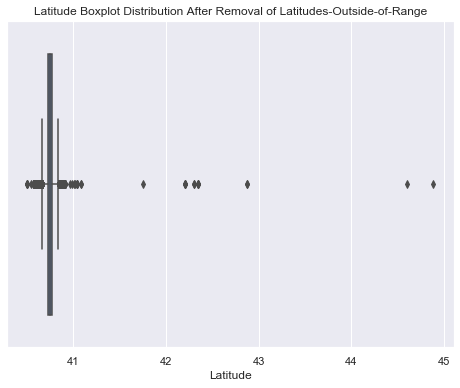

In [13]:
plt.figure(figsize=(8,6))
plt.title("Latitude Boxplot Distribution After Removal of Latitudes-Outside-of-Range")
plt.xlabel("Latitude")
ax = sns.boxplot(trainData.latitude.values)
plt.show()

In [14]:
trainData[trainData.latitude >= 41].count()

bathrooms          23
bedrooms           23
building_id        23
created            23
description        23
display_address    23
features           23
interest_level     23
latitude           23
listing_id         23
longitude          23
manager_id         23
photos             22
price              23
street_address     23
dtype: int64

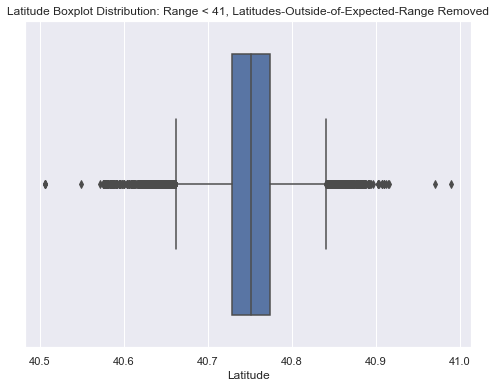

In [15]:
plt.figure(figsize=(8,6))
plt.title("Latitude Boxplot Distribution: Range < 41, Latitudes-Outside-of-Expected-Range Removed")
plt.xlabel("Latitude")
ax = sns.boxplot(trainData[trainData.latitude < 41].latitude.values)
# plt.show()
plt.savefig("figures_saved/boxplot_latitude_inrange_under41")

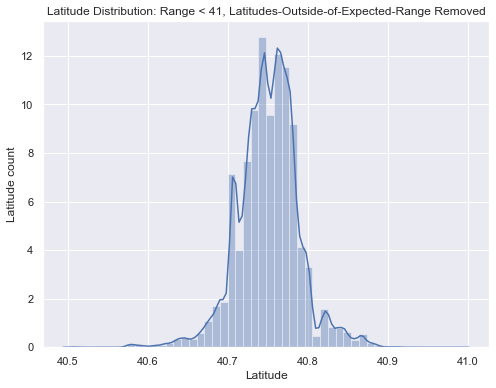

In [16]:
plt.figure(figsize=(8,6))
plt.title("Latitude Distribution: Range < 41, Latitudes-Outside-of-Expected-Range Removed")
plt.xlabel("Latitude")
plt.ylabel("Latitude count")
sns.distplot(trainData[trainData.latitude < 41].latitude.values, bins=50)
# plt.show()
plt.savefig("figures_saved/dist_latitude_inrange_under41")

### Longitude

In [17]:
outlierLong = trainData[['longitude']]

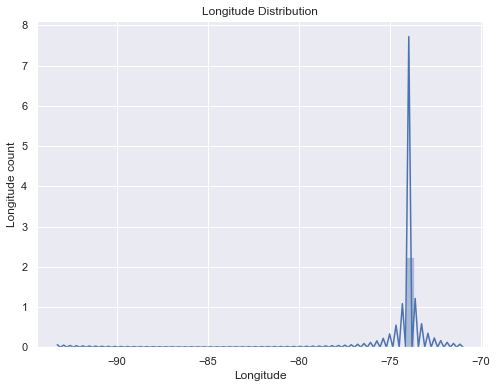

In [18]:
plt.figure(figsize=(8,6))
plt.title("Longitude Distribution")
plt.xlabel("Longitude")
plt.ylabel("Longitude count")
# plt.hist(outlierLong.longitude, range=(outlierLong.longitude.min(),outlierLong.longitude.max()), bins=50)
sns.distplot(outlierLong.longitude.values, bins=50)
# plt.show()
plt.savefig("figures_saved/dist_longitude_full")

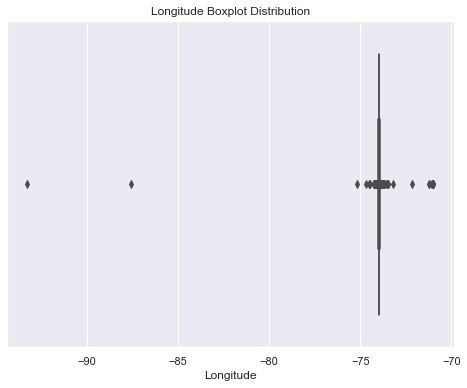

In [19]:
plt.figure(figsize=(8,6))
plt.title("Longitude Boxplot Distribution")
plt.xlabel("Longitude")
ax = sns.boxplot(outlierLong.longitude.values)
# plt.show()
plt.savefig("figures_saved/boxplot_longitude")

In [20]:
#Check within longitude bound
row, column = np.where(outlierLong.applymap(lambda x: (x < minLong) | (x > maxLong)))
outlierLong.iloc[row]

,longitude
5581,-71.0794
13495,-71.0794
18271,-70.9846
18884,-70.9846
24247,-70.9846
25993,-71.2133
29493,-87.6134
29555,-71.2133
31368,-93.2705
31978,-71.0794


In [21]:
outlier_counts.loc['longitude'] = outlierLong.iloc[row].count().values
display(outlier_counts)

,outlier_counts
latitude,4
longitude,12


In [22]:
trainData = trainData.drop(trainData.index[row], errors='ignore')

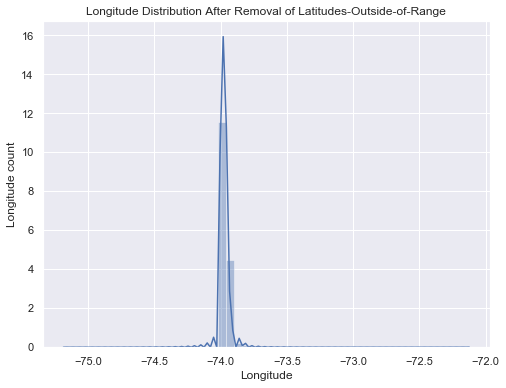

In [23]:
plt.figure(figsize=(8,6))
plt.title("Longitude Distribution After Removal of Latitudes-Outside-of-Range")
plt.xlabel("Longitude")
plt.ylabel("Longitude count")
# plt.hist(trainData.longitude, range=(trainData.longitude.min(),trainData.longitude.max()), bins=50)
sns.distplot(trainData.longitude.values, bins=50)
# plt.show()
plt.savefig("figures_saved/dist_longitude_full_inrange")

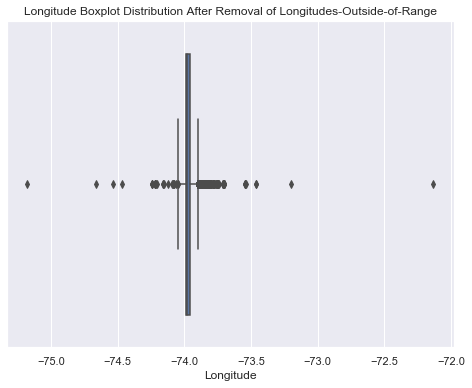

In [24]:
plt.figure(figsize=(8,6))
plt.title("Longitude Boxplot Distribution After Removal of Longitudes-Outside-of-Range")
plt.xlabel("Longitude")
ax = sns.boxplot(trainData.longitude.values)
plt.show()

In [25]:
trainData[trainData.longitude < -74.2].count()

bathrooms          13
bedrooms           13
building_id        13
created            13
description        13
display_address    13
features           13
interest_level     13
latitude           13
listing_id         13
longitude          13
manager_id         13
photos             12
price              13
street_address     13
dtype: int64

In [26]:
trainData[trainData.longitude > -73.7].count()

bathrooms          8
bedrooms           8
building_id        8
created            8
description        8
display_address    8
features           8
interest_level     8
latitude           8
listing_id         8
longitude          8
manager_id         8
photos             8
price              8
street_address     8
dtype: int64

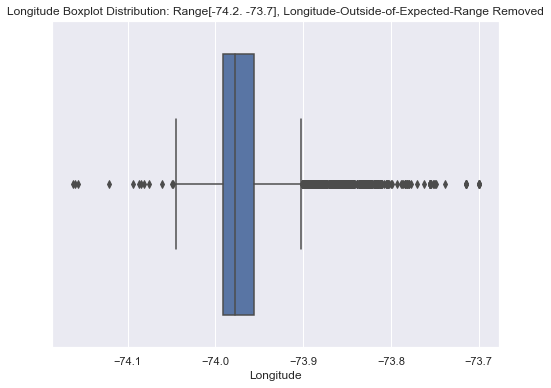

In [27]:
plt.figure(figsize=(8,6))
plt.title("Longitude Boxplot Distribution: Range[-74.2. -73.7], Longitude-Outside-of-Expected-Range Removed")
plt.xlabel("Longitude")
ax = sns.boxplot(trainData[(trainData.longitude >= -74.2) & (trainData.longitude <= -73.7)].longitude.values)
# plt.show()
plt.savefig("figures_saved/boxplot_longitude_inrange_trim")

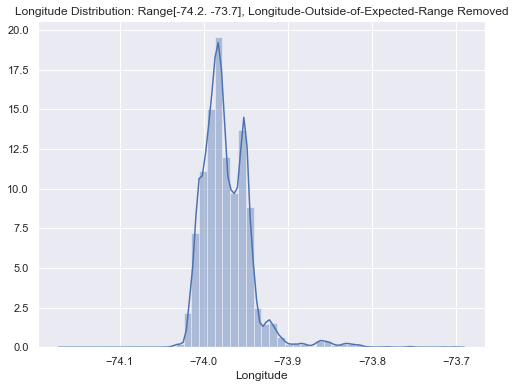

In [28]:
plt.figure(figsize=(8,6))
plt.title("Longitude Distribution: Range[-74.2. -73.7], Longitude-Outside-of-Expected-Range Removed")
plt.xlabel("Longitude")
sns.distplot(trainData[(trainData.longitude >= -74.2) & (trainData.longitude <= -73.7)].longitude.values, bins=50)
# plt.show()
plt.savefig("figures_saved/dist_longitude_inrange_trim")

### Price

Find and remove outlier using interquartile range
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [29]:
outlierPrice = trainData[['price']]
# outlierPrice

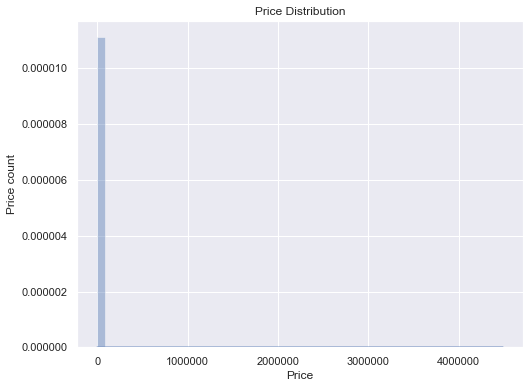

In [30]:
plt.figure(figsize=(8,6))
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Price count")
# plt.hist(outlierPrice.price, range=(outlierPrice.price.min(),outlierPrice.price.max()), bins=50)
# plt.hist(outlierPrice.price, range=(outlierPrice.price.min(),10000), bins=50)
sns.distplot(outlierPrice.price.values, bins=50)
# plt.show()
plt.savefig("figures_saved/dist_price_full")

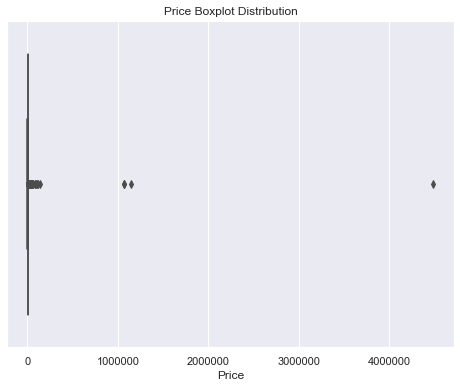

In [31]:
plt.figure(figsize=(8,6))
plt.title("Price Boxplot Distribution")
plt.xlabel("Price")
sns.boxplot(outlierPrice.price.values)
# plt.show()
plt.savefig("figures_saved/boxplot_price")

In [32]:
Q1 = outlierPrice.quantile(0.25)
Q3 = outlierPrice.quantile(0.75)
IQR = Q3 - Q1
display(Q1, Q3, IQR)

price    2500.0
Name: 0.25, dtype: float64

price    4195.0
Name: 0.75, dtype: float64

price    1695.0
dtype: float64

In [33]:
# outlierPrice['price_outlier'] = (outlierPrice < (Q1 - 1.5 * IQR)) | (outlierPrice > (Q3 + 1.5 * IQR))
# rows_outliers = outlierPrice[outlierPrice['price_outlier'] == True].index
# display(rows_outliers)
row, column = np.where(outlierPrice.applymap(lambda price: (price < (Q1[0] - 1.5 * IQR[0])) | (price > (Q3[0] + 1.5 * IQR[0]))))

In [34]:
display(row, outlierPrice.iloc[row])
display(outlierPrice.iloc[row].min(), outlierPrice.iloc[row].max())

array([  117,   119,   120, ..., 46095, 46106, 46109], dtype=int64)

,price
117,7700
119,7700
120,7150
122,7500
197,10000
...,...
46059,8750
46105,8500
46111,135000
46122,6995


price    6738
dtype: int64

price    4490000
dtype: int64

In [35]:
# outlier_counts.loc['price'] = outlierPrice.iloc[rows_outliers].count().values
outlier_counts.loc['price'] = outlierPrice.iloc[row].count().values
display(outlier_counts)

,outlier_counts
latitude,4
longitude,12
price,2512


In [36]:
display(trainData.count())
display(trainData.price.min(), trainData.price.max())

bathrooms          46137
bedrooms           46137
building_id        46137
created            46137
description        46137
display_address    46137
features           46137
interest_level     46137
latitude           46137
listing_id         46137
longitude          46137
manager_id         46137
photos             42865
price              46137
street_address     46137
dtype: int64

43

4490000

In [37]:
# trainData = trainData.drop(outlierPrice[outlierPrice['price_outlier'] == True].index)
trainData = trainData.drop(trainData.index[row], errors='ignore')
display(trainData.count())
display(trainData.price.min(), trainData.price.max())

bathrooms          43625
bedrooms           43625
building_id        43625
created            43625
description        43625
display_address    43625
features           43625
interest_level     43625
latitude           43625
listing_id         43625
longitude          43625
manager_id         43625
photos             40532
price              43625
street_address     43625
dtype: int64

43

6728

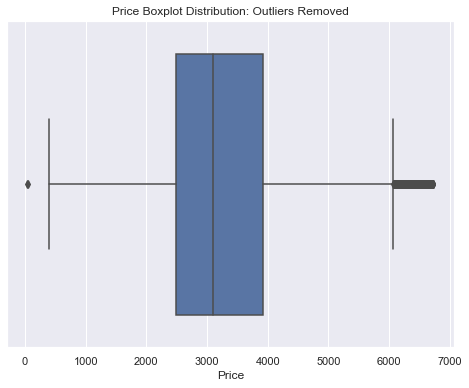

In [38]:
plt.figure(figsize=(8,6))
plt.title("Price Boxplot Distribution: Outliers Removed")
plt.xlabel("Price")
ax = sns.boxplot(trainData.price.values)
# plt.show()
plt.savefig("figures_saved/boxplot_price_outlierremoved")

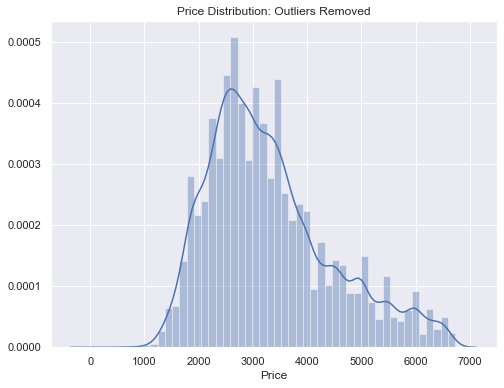

In [39]:
plt.figure(figsize=(8,6))
plt.title("Price Distribution: Outliers Removed")
plt.xlabel("Price")
sns.distplot(trainData.price.values, bins=50)
# plt.show()
plt.savefig("figures_saved/dist_price_outlierremoved")

## Checking Other Attributes/Features

In [40]:
trainData

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,2.0,3,b66d3340ba269e6f184bfad550a6f05f,2016-06-24 07:55:11,Welcome to your new home! This extravagantly o...,president street,"[Dining Room, Laundry in Building, High Speed ...",low,40.6678,7211226,-73.9398,929baf387cf71d98482a9743ab8a0890,[https://photos.renthop.com/2/7211226_7c7b8bc2...,3050,1475 president street
1,2.0,3,b66d3340ba269e6f184bfad550a6f05f,2016-04-29 03:29:11,"<![CDATA[3 bedrooms, 3100, Bedford Stuyvesant/...",president street,[],low,40.6678,6941286,-73.9398,a12c733c6cba53a6d2fe8a1fdfd5a674,[https://photos.renthop.com/2/6941286_252212fd...,3100,1475 president street
2,1.0,1,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-17 01:22:28,"This newly renovated, queen sized 1 Bed / 1 Ba...",east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7174518,-73.9810,befc71000fbd97ffe17b1ef8566b0590,[https://photos.renthop.com/2/7174518_ac2cde58...,2850,504 east 12th street
3,1.0,3,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-08 01:12:34,"Prime East Village 3 bedroom, 1 bath apartment...",east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7122279,-73.9810,e7f859b81a2a75ac93042a721d70a0aa,[https://photos.renthop.com/2/7122279_fea77391...,4200,504 east 12th street
4,1.0,1,7e9fd0dea8ad2c8ac0a1022a1f0d997b,2016-06-11 01:27:45,Welcome to your next new home.This 1BR/1BA uni...,east 12th street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7287,7138528,-73.9810,89179891e92a87e72ac3132fc5a977e8,[https://photos.renthop.com/2/7138528_940f2e70...,2850,504 east 12th street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46148,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,west 171 street,"[Elevator, Dishwasher, Hardwood Floors]",low,40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 west 171 street
46149,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",medium,40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 broadway
46150,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 brighton 15th street,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",medium,40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 brighton 15th street
46151,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,west 21st street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",medium,40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 west 21st street


### Bathrooms

In [41]:
bathrooms = trainData[['bathrooms']]
# bathrooms

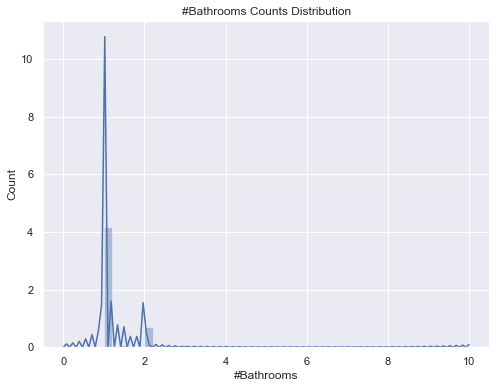

In [42]:
plt.figure(figsize=(8,6))
plt.title("#Bathrooms Counts Distribution")
plt.xlabel("#Bathrooms")
plt.ylabel("Count")
sns.distplot(bathrooms.values)
# plt.show()
plt.savefig("figures_saved/dist_bathrooms")

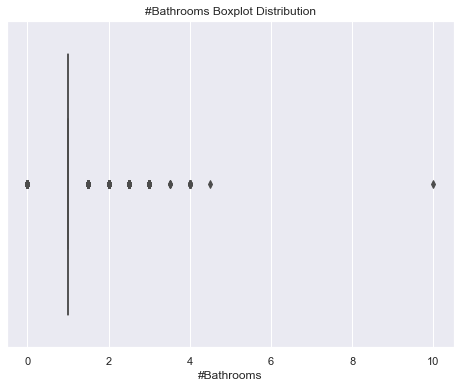

In [43]:
plt.figure(figsize=(8,6))
plt.title("#Bathrooms Boxplot Distribution")
plt.xlabel("#Bathrooms")
ax = sns.boxplot(bathrooms.values)
# plt.show()
plt.savefig("figures_saved/boxplot_bathrooms")

In [44]:
# See the tabularized counts
display(bathrooms.groupby(['bathrooms']).size())

# Select number of bathrooms outside the reasonable/acceptable range of 0 to 3
row, column = np.where(bathrooms.applymap(lambda x: x > 3))
display(bathrooms.iloc[row])

# Save the number of outliers
outlier_counts.loc['bathrooms'] = bathrooms.iloc[row].count().values
display(outlier_counts)

bathrooms
0.0       286
1.0     36468
1.5       589
2.0      6038
2.5        83
3.0       143
3.5         3
4.0        13
4.5         1
10.0        1
dtype: int64

,bathrooms
6183,3.5
8993,4.0
12781,3.5
19295,3.5
20356,4.0
21010,4.0
22623,4.0
23073,4.0
26722,4.0
27378,4.0


,outlier_counts
latitude,4
longitude,12
price,2512
bathrooms,18


In [45]:
# Dropping the outlier rows
trainData = trainData.drop(trainData.index[row], errors='ignore')
display(trainData.count())
display(trainData.bathrooms.min(), trainData.bathrooms.max())

bathrooms          43607
bedrooms           43607
building_id        43607
created            43607
description        43607
display_address    43607
features           43607
interest_level     43607
latitude           43607
listing_id         43607
longitude          43607
manager_id         43607
photos             40515
price              43607
street_address     43607
dtype: int64

0.0

3.0

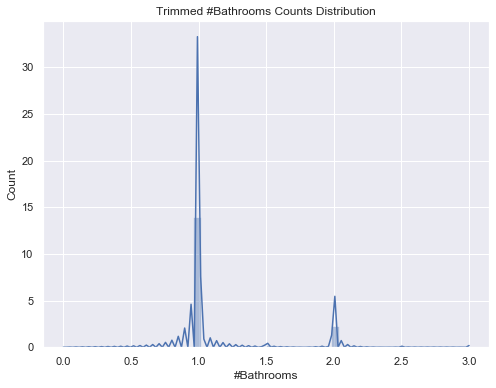

In [46]:
plt.figure(figsize=(8,6))
plt.title("Trimmed #Bathrooms Counts Distribution")
plt.xlabel("#Bathrooms")
plt.ylabel("Count")
sns.distplot(trainData.bathrooms.values)
# plt.show()
plt.savefig("figures_saved/dist_bathrooms_trim")

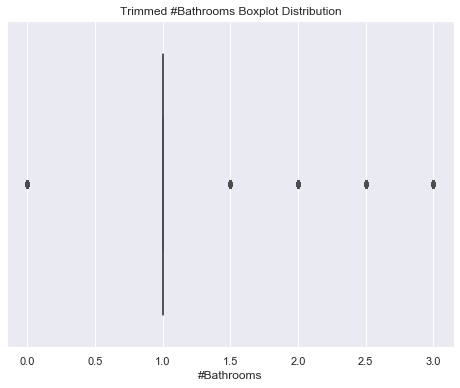

In [47]:
plt.figure(figsize=(8,6))
plt.title("Trimmed #Bathrooms Boxplot Distribution")
plt.xlabel("#Bathrooms")
ax = sns.boxplot(trainData.bathrooms.values)
# plt.show()
plt.savefig("figures_saved/boxplot_bathrooms_trim")

### Bedrooms

In [48]:
bedrooms = trainData[['bedrooms']]
# bedrooms

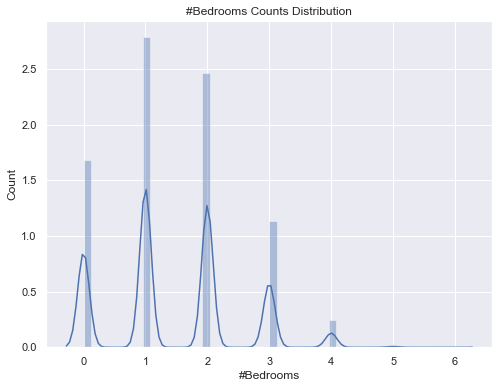

In [49]:
plt.figure(figsize=(8,6))
plt.title("#Bedrooms Counts Distribution")
plt.xlabel("#Bedrooms")
plt.ylabel("Count")
sns.distplot(bedrooms.values)
# plt.show()
plt.savefig("figures_saved/dist_bedrooms")

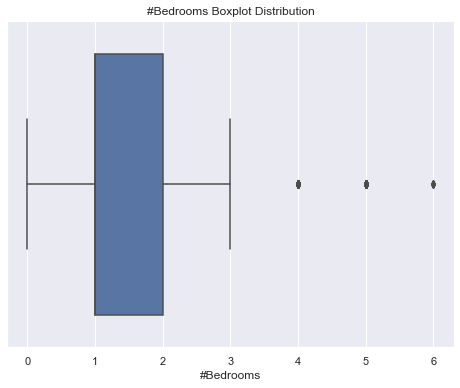

In [50]:
plt.figure(figsize=(8,6))
plt.title("#Bedrooms Boxplot Distribution")
plt.xlabel("#Bedrooms")
ax = sns.boxplot(bedrooms.values)
# plt.show()
plt.savefig("figures_saved/boxplot_bedrooms")

In [51]:
# See the tabularized counts
display(bedrooms.groupby(['bedrooms']).size())

# Select number of bedrooms outside the reasonable/acceptable range of 0 to 4
row, column = np.where(bedrooms.applymap(lambda x: x > 4))
display(bedrooms.iloc[row])

# Save the number of outliers
outlier_counts.loc['bedrooms'] = bedrooms.iloc[row].count().values
display(outlier_counts)

bedrooms
0     8798
1    14609
2    12898
3     5933
4     1290
5       75
6        4
dtype: int64

,bedrooms
823,5
1329,5
2879,5
4011,5
4251,5
...,...
44260,5
44426,5
44457,5
46084,5


,outlier_counts
latitude,4
longitude,12
price,2512
bathrooms,18
bedrooms,79


In [52]:
# Dropping the outlier rows
trainData = trainData.drop(trainData.index[row], errors='ignore')
display(trainData.count())
display(trainData.bedrooms.min(), trainData.bedrooms.max())

bathrooms          43528
bedrooms           43528
building_id        43528
created            43528
description        43528
display_address    43528
features           43528
interest_level     43528
latitude           43528
listing_id         43528
longitude          43528
manager_id         43528
photos             40445
price              43528
street_address     43528
dtype: int64

0

4

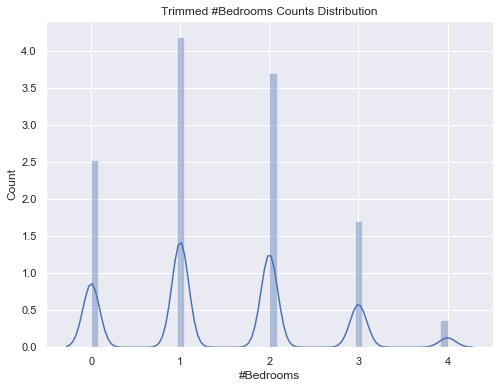

In [53]:
plt.figure(figsize=(8,6))
plt.title("Trimmed #Bedrooms Counts Distribution")
plt.xlabel("#Bedrooms")
plt.ylabel("Count")
sns.distplot(trainData.bedrooms.values)
# plt.show()
plt.savefig("figures_saved/dist_bedrooms_trim")

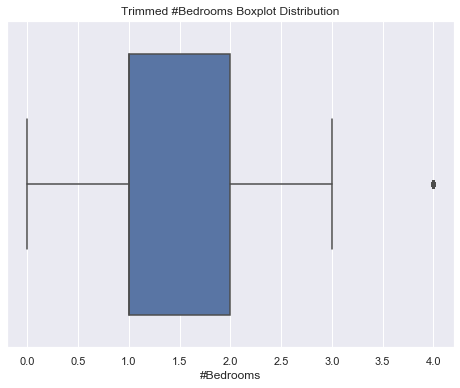

In [54]:
plt.figure(figsize=(8,6))
plt.title("Trimmed #Bedrooms Boxplot Distribution")
plt.xlabel("#Bedrooms")
ax = sns.boxplot(trainData.bedrooms.values)
# plt.show()
plt.savefig("figures_saved/boxplot_bedrooms_trim")

### Date Created

In [55]:
dateCreated = trainData[['created']]
dateCreated

,created
0,2016-06-24 07:55:11
1,2016-04-29 03:29:11
2,2016-06-17 01:22:28
3,2016-06-08 01:12:34
4,2016-06-11 01:27:45
...,...
46148,2016-04-05 03:58:33
46149,2016-04-02 02:25:31
46150,2016-04-26 05:42:03
46151,2016-04-19 02:47:33


C:\Users\HP\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


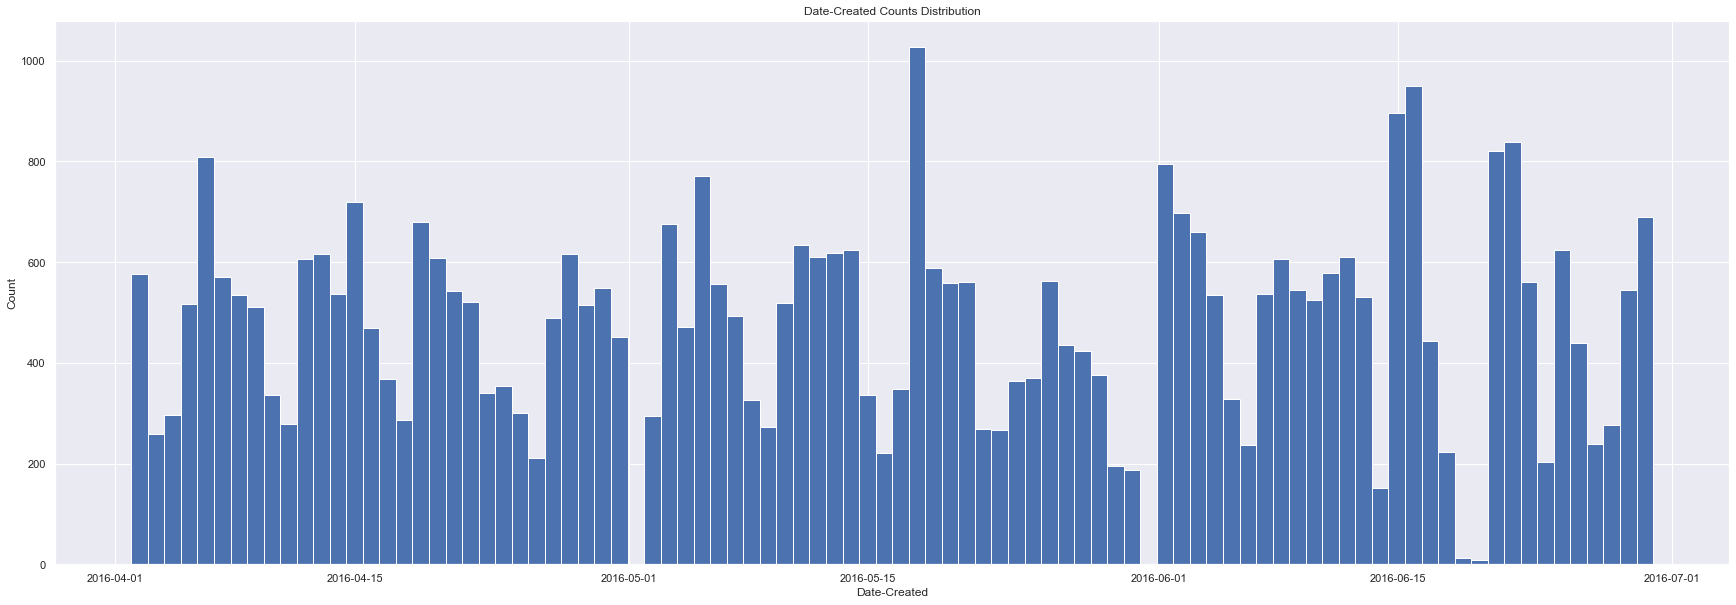

In [56]:
plt.figure(figsize=(30,10))
plt.title("Date-Created Counts Distribution")
plt.xlabel("Date-Created")
plt.ylabel("Count")

# dateCreated.created = dateCreated.created.astype("datetime64")
# dateCreated.resample('D', level=0)
# dateCreated.created.to_period('D')

# sns.distplot(dateCreated.values)
# sns.tsplot(dateCreated.values)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.hist(dateCreated.created, bins=92) # 92 days = 30+31+30+1

# ax = dateCreated.groupby([dateCreated.created.dt.month, dateCreated.created.dt.day]).count().plot(kind="bar")

# ax = plt.gca()
# ax.hist(dateCreated.created.values)

plt.show()
# plt.savefig("figures_saved/dist_date-created")

## Final Check After All Outlier Analyses and Removals

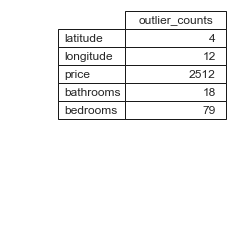

In [57]:
# Check resulting data
# display(trainData)

# Tabularize counts of outliers
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_frame_on(False)  # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, df_missing_counts)
tabla = table(ax, outlier_counts, loc='upper right', colWidths=[0.3])  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.5, 1.5) # change size table
plt.savefig("figures_saved/table_outlier-counts", transparent=True)

## Save Processed Dataset

In [58]:
trainDataWithoutOutlierDir = "dataset/two-sigma-connect-rental-listing-inquiries/trainCleanedOutlier.json.zip"
trainData.to_json(trainDataWithoutOutlierDir)